<a href="https://colab.research.google.com/github/brainmentorspvtltd/MAIT_FDP_2023/blob/main/CovidDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request as url
import json

In [19]:
path = "https://data.covid19india.org/states_daily.json"
response = url.urlopen(path)

In [20]:
data = json.load(response)

In [21]:
type(data)

dict

In [22]:
data.keys()

dict_keys(['states_daily'])

In [23]:
df = pd.DataFrame(data['states_daily'])

In [24]:
df.shape

(1563, 42)

In [25]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [26]:
df['tt'][0]

'81'

In [27]:
df['tt'] = df['tt'].astype('int32')
df['up'] = df['up'].astype('int32')
df['dl'] = df['dl'].astype('int32')
df['hr'] = df['hr'].astype('int32')
df['rj'] = df['rj'].astype('int32')

In [28]:
df['tt'][0]

81

In [33]:
df['dateymd'][0]

'2020-03-14'

In [34]:
df['dateymd'] = pd.to_datetime(df['dateymd'])

In [36]:
df['dateymd'][0]

Timestamp('2020-03-14 00:00:00')

In [37]:
df['tt'].sum()

64122259

In [38]:
confirmed_df = df[df['status'] == 'Confirmed']
recovered_df = df[df['status'] == 'Recovered']
deceased_df = df[df['status'] == 'Deceased']

In [39]:
confirmed_df['tt'].sum()

32249044

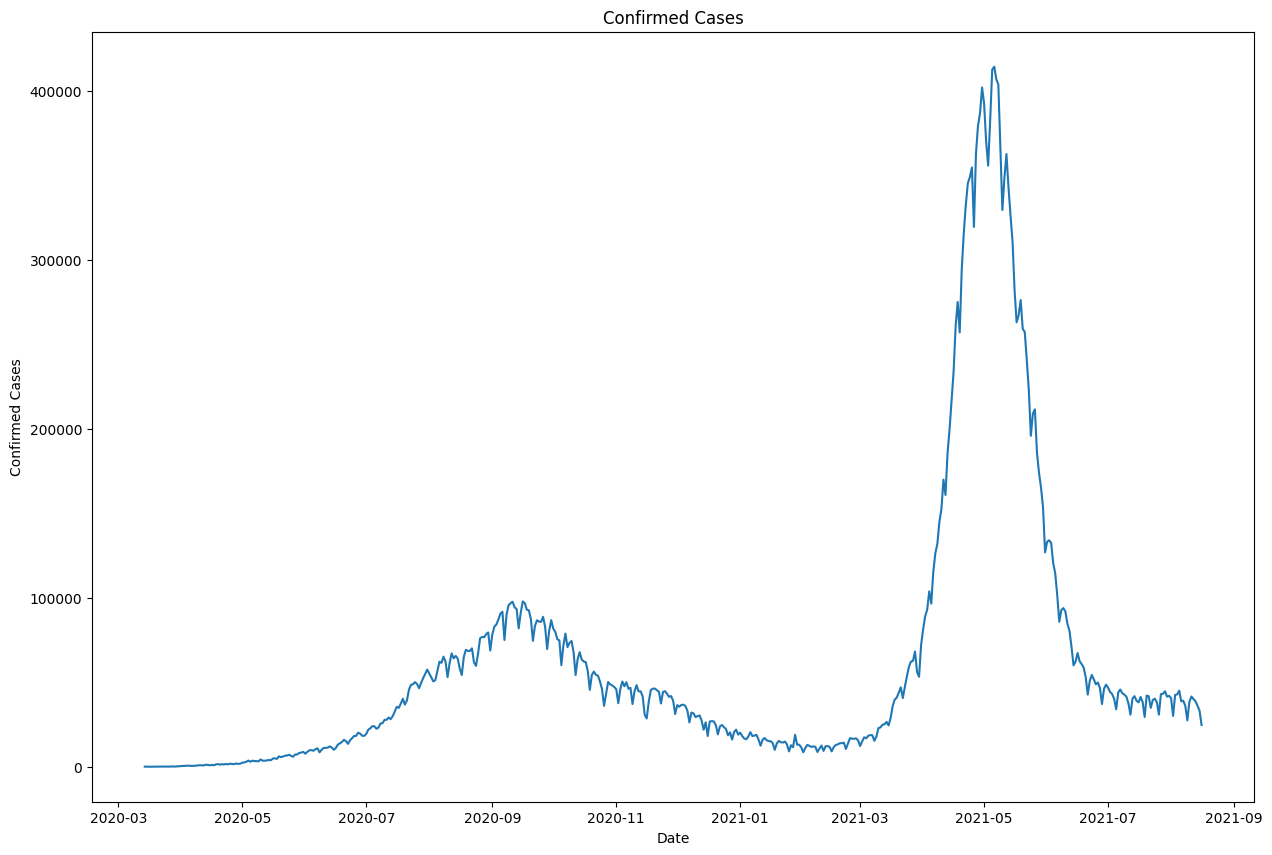

In [41]:
plt.figure(figsize=(15,10))
plt.plot(confirmed_df['dateymd'], confirmed_df['tt'])
plt.title("Confirmed Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

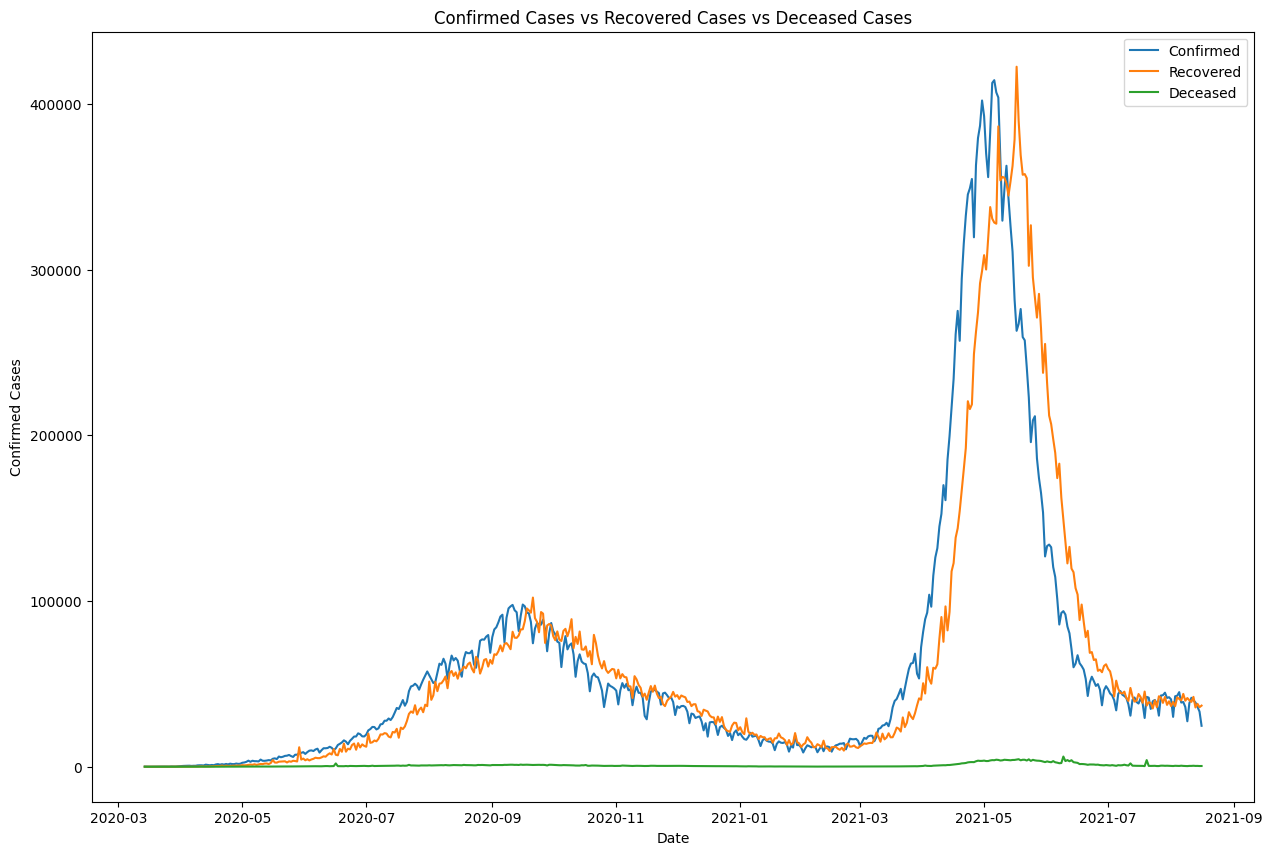

In [43]:
plt.figure(figsize=(15,10))
plt.plot(confirmed_df['dateymd'], confirmed_df['tt'], label="Confirmed")
plt.plot(recovered_df['dateymd'], recovered_df['tt'], label="Recovered")
plt.plot(deceased_df['dateymd'], deceased_df['tt'], label="Deceased")
plt.title("Confirmed Cases vs Recovered Cases vs Deceased Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

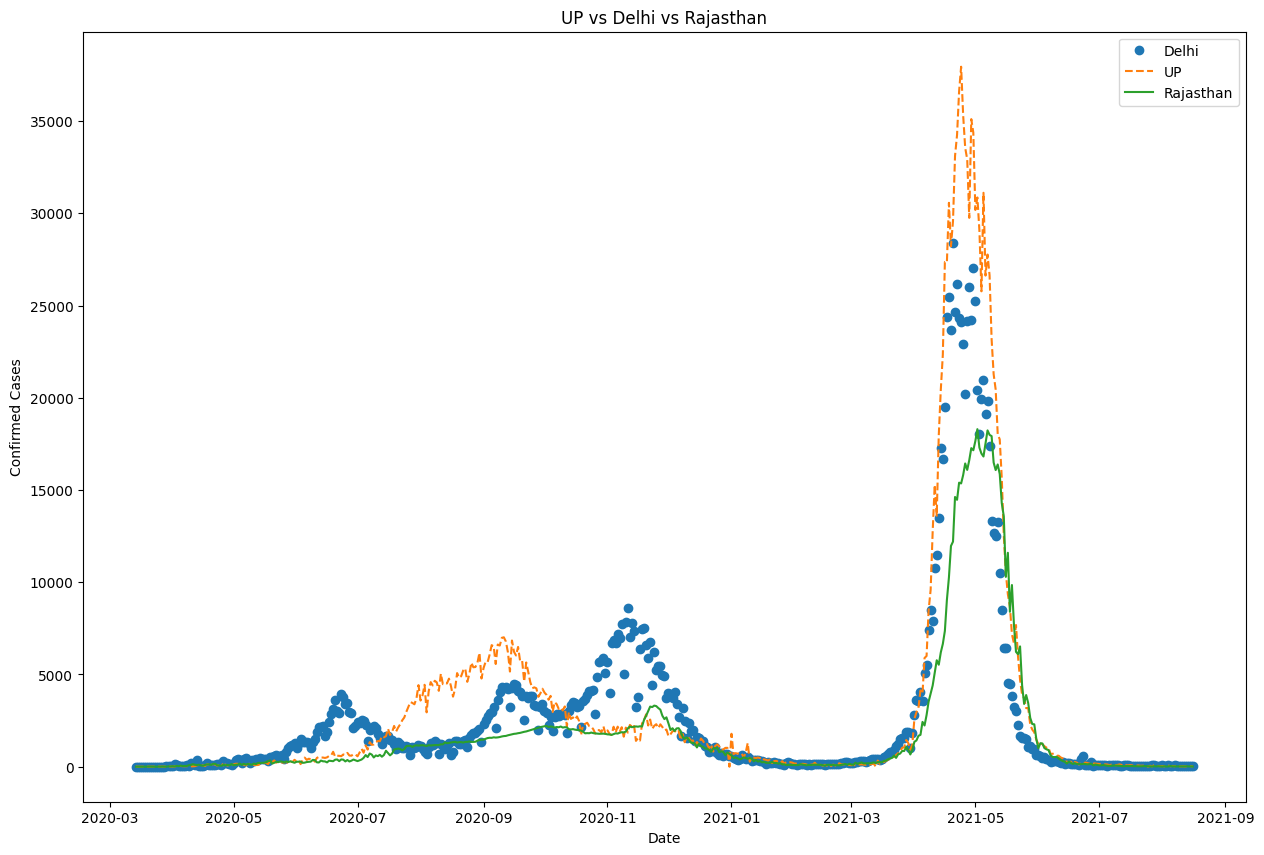

In [58]:
plt.figure(figsize=(15,10))
plt.plot(confirmed_df['dateymd'], confirmed_df['dl'], 'o', label="Delhi")
plt.plot(confirmed_df['dateymd'], confirmed_df['up'], '--', label="UP")
plt.plot(confirmed_df['dateymd'], confirmed_df['rj'], label="Rajasthan")
plt.title("UP vs Delhi vs Rajasthan")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

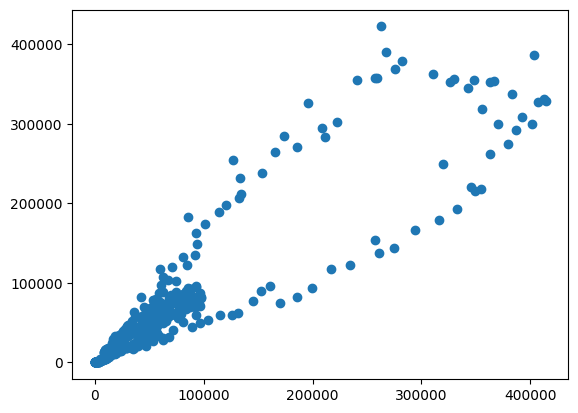

In [46]:
plt.scatter(confirmed_df['tt'], recovered_df['tt'])
plt.show()

In [48]:
import seaborn as sns

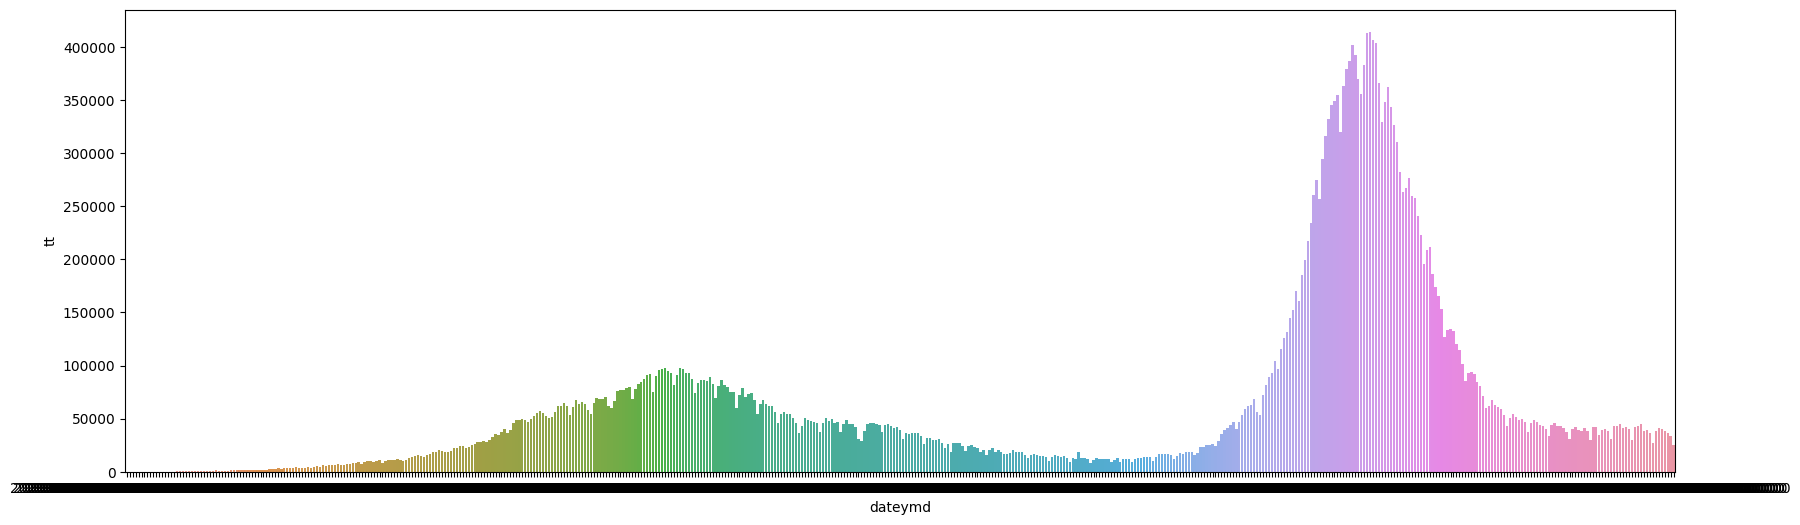

In [59]:
plt.figure(figsize=(20,6))
sns.barplot(confirmed_df, x='dateymd', y='tt')
plt.show()